# Week4授業前課題1 アヤメの分類

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## 課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica  
sepal_lengthとpetal_length

In [2]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris["species"] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris = iris.loc[:, ["sepal length (cm)", "petal length (cm)", "species"]]
iris = iris[iris["species"].isin(["1", "2"])]
iris.head()

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

In [7]:
iris_virgicolor = iris[iris["species"] == 1]
iris_virginica = iris[iris["species"] == 2]

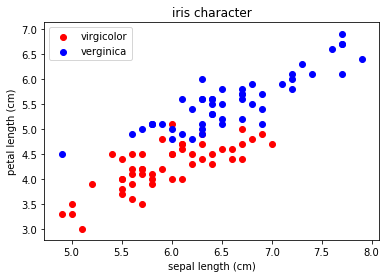

In [17]:
plt.scatter(iris_virgicolor["sepal length (cm)"], iris_virgicolor["petal length (cm)"], c="red", label="virgicolor")
plt.scatter(iris_virginica["sepal length (cm)"], iris_virginica["petal length (cm)"], c="blue", label="verginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("iris character")
plt.legend()
plt.show()

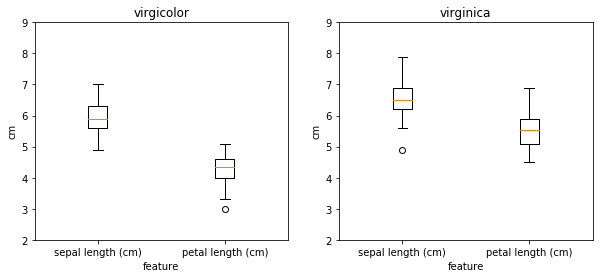

In [48]:
plt.subplots(figsize=(10, 4))


plt.subplot(1,2,1)
plt.boxplot([iris_virgicolor["sepal length (cm)"], iris_virgicolor["petal length (cm)"]])
plt.xticks([1, 2],["sepal length (cm)", "petal length (cm)"])
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2, 9)

plt.subplot(1,2,2)
plt.boxplot([iris_virginica["sepal length (cm)"], iris_virginica["petal length (cm)"]])
plt.xticks([1, 2],["sepal length (cm)", "petal length (cm)"])
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2, 9)

plt.show()

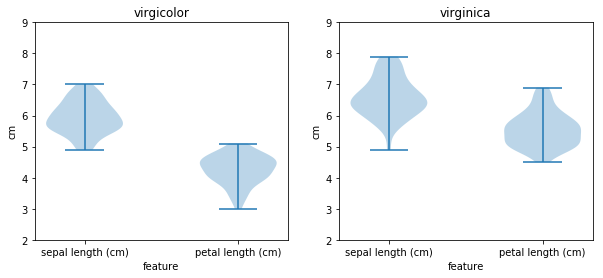

In [47]:
plt.subplots(figsize=(10, 4))


plt.subplot(1,2,1)
plt.violinplot([iris_virgicolor["sepal length (cm)"], iris_virgicolor["petal length (cm)"]])
plt.xticks([1, 2],["sepal length (cm)", "petal length (cm)"])
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2, 9)

plt.subplot(1,2,2)
plt.violinplot([iris_virginica["sepal length (cm)"], iris_virginica["petal length (cm)"]])
plt.xticks([1, 2],["sepal length (cm)", "petal length (cm)"])
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2, 9)

plt.show()

## 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

In [49]:
X = iris.drop(columns = "species").values
y = iris["species"].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [51]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [53]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)

train_knn_5 = knn_5.fit(X_train_sc, y_train)
train_knn_1 = knn_1.fit(X_train_sc, y_train)
train_knn_3 = knn_3.fit(X_train_sc, y_train)

y_pred_knn5 = train_knn_5.predict(X_test_sc)
y_pred_knn1 = train_knn_1.predict(X_test_sc)
y_pred_knn3 = train_knn_3.predict(X_test_sc)

print(y_pred_knn5)
print(y_pred_knn1)
print(y_pred_knn3)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]


## 【問題6】評価
<pre>
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。それぞれの意味を理解するには、
混合行列（confusion matrix） を見ることになります。

scikit-learnを使い4種類の指標を計算する
混合行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる

In [54]:
conf_mat_knn5 = confusion_matrix(y_test, y_pred_knn5)
conf_mat_knn1 = confusion_matrix(y_test, y_pred_knn1)
conf_mat_knn3 = confusion_matrix(y_test, y_pred_knn3)

print(conf_mat_knn5)
print(conf_mat_knn1)
print(conf_mat_knn3)

[[11  3]
 [ 1 10]]
[[12  2]
 [ 0 11]]
[[12  2]
 [ 1 10]]


In [55]:
#accuracy score
acc_knn5 = accuracy_score(y_test, y_pred_knn5)
acc_knn1 = accuracy_score(y_test, y_pred_knn1)
acc_knn3 = accuracy_score(y_test, y_pred_knn3)

print(acc_knn5)
print(acc_knn1)
print(acc_knn3)

0.84
0.92
0.88


In [56]:
#precision
precision_knn5 = precision_score(y_test, y_pred_knn5)
precision_knn1 = precision_score(y_test, y_pred_knn1)
precision_knn3 = precision_score(y_test, y_pred_knn3)

print(precision_knn5)
print(precision_knn1)
print(precision_knn3)

0.9166666666666666
1.0
0.9230769230769231


In [57]:
#recall
recall_knn5 = recall_score(y_test, y_pred_knn5)
recall_knn1 = recall_score(y_test, y_pred_knn1)
recall_knn3 = recall_score(y_test, y_pred_knn3)

print(recall_knn5)
print(recall_knn1)
print(recall_knn3)

0.7857142857142857
0.8571428571428571
0.8571428571428571


In [58]:
#f1 score
f1_knn5 = f1_score(y_test, y_pred_knn5)
f1_knn1 = f1_score(y_test, y_pred_knn1)
f1_knn3 = f1_score(y_test, y_pred_knn3)

print(f1_knn5)
print(f1_knn1)
print(f1_knn3)

0.8461538461538461
0.923076923076923
0.888888888888889


<pre>混同行列
　　分類器によって予測された結果と実際の結果を以下のように行列で分けたもの</pre>
  　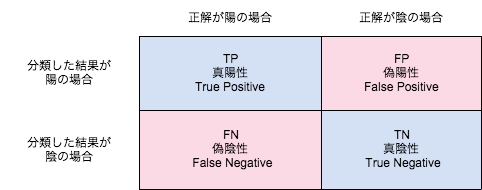

<pre>
正解率(accuracy)
　　分類器によって分類されたもののうち、全ての分類のうち正しく分類されている割合
  　
   　accuracy = TP + TN  /  TP + TN + FN + FP

<pre>
適合率(precision)
　　ポジティブだと予測したもののうち、どれだけ正解が含まれているか
    
    precision = TP / TP + FP

<pre>
再現率(recall)
　　実際にポジティブであるもののうち、どれだけポジティブだと予測できたか
    
    racall = TP / TP + FN

<pre>
F値 (f1 score)
　　適合率(presicion)と再現率(recall)の調和平均
  　適合率と再現率を一つにまとめて全体として評価を行う
　　0＜f＜１の値をとり１に近づくと良い
  　
   f1 score = 2 * presicion * racall  /  presicion + recall

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [61]:
def decision_region(X_train, y_train, model, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i],
                    label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

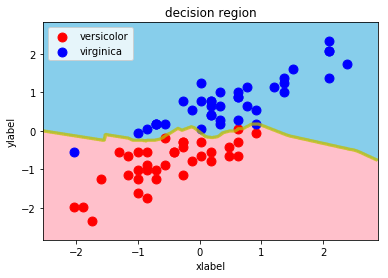

In [62]:
decision_region(X_train_sc, y_train, knn_3)

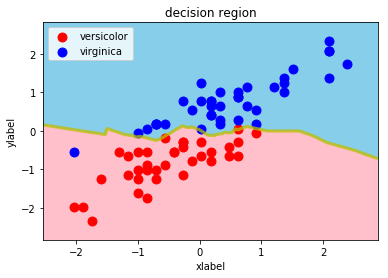

In [63]:
decision_region(X_train_sc, y_train, knn_5)

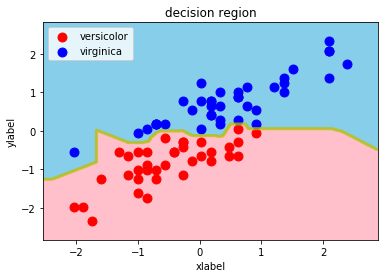

In [64]:
decision_region(X_train_sc, y_train, knn_1)

## 【問題8】他の手法の学習
<pre>
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

In [74]:
# logistic regression model 
logreg = LogisticRegression()
logreg = logreg.fit(X_train_sc, y_train)

y_pred_logreg = logreg.predict(X_test_sc)

cnf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)


/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
# SVM
svmcf = SVC()
svmcf = svmcf.fit(X_train_sc, y_train)

y_pred_svmcf = svmcf.predict(X_test_sc)

cnf_matrix_svmcf = confusion_matrix(y_test, y_pred_svmcf)
accuracy_svmcf = accuracy_score(y_test, y_pred_svmcf)
precision_svmcf = precision_score(y_test, y_pred_svmcf)
recall_svmcf = recall_score(y_test, y_pred_svmcf)
f1_svmcf = f1_score(y_test, y_pred_svmcf)


In [72]:
#Decision Tree
dtcf = DecisionTreeClassifier()
dtcf = dtcf.fit(X_train_sc, y_train)

y_pred_dtcf = dtcf.predict(X_test_sc)

cnf_matrix_dtcf = confusion_matrix(y_test, y_pred_dtcf)
accuracy_dtcf = accuracy_score(y_test, y_pred_dtcf)
precision_dtcf  = precision_score(y_test, y_pred_dtcf)
recall_dtcf = recall_score(y_test, y_pred_dtcf)
f1_dtcf  = f1_score(y_test, y_pred_dtcf)


In [71]:
#Random Forest
RF = RandomForestClassifier()
RF = RF.fit(X_train_sc, y_train)

y_pred_RF = dtcf.predict(X_test_sc)

cnf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF  = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)


/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
result_df = pd.DataFrame({"accuracy":[acc_knn5,accuracy_logreg,accuracy_svmcf,accuracy_dtcf,accuracy_RF],
                         "precision":[precision_knn5,precision_logreg,precision_svmcf ,precision_dtcf,precision_RF],
                         "recall":[recall_knn5,recall_logreg,recall_svmcf, recall_dtcf, recall_RF],
                         "f1 score":[f1_knn5,f1_logreg, f1_svmcf, f1_dtcf, f1_RF]},
                        index=["k-means", "LogisticRegression", "SVM", "DecisionTree", "RandomForest"])
result_df

,accuracy,precision,recall,f1 score
k-means,0.84,0.916667,0.785714,0.846154
LogisticRegression,0.92,1.000000,0.857143,0.923077
SVM,0.88,1.000000,0.785714,0.880000
DecisionTree,0.92,1.000000,0.857143,0.923077
RandomForest,0.92,1.000000,0.857143,0.923077


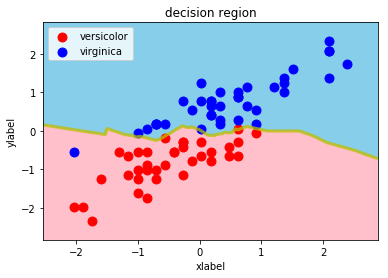

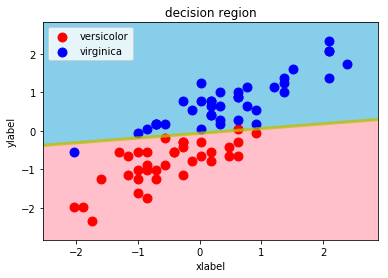

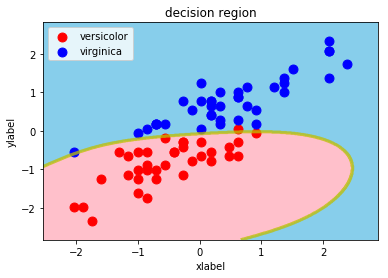

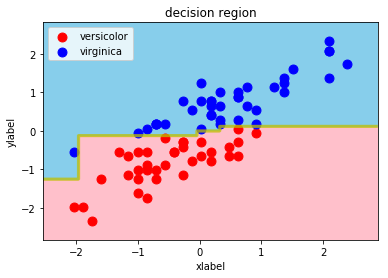

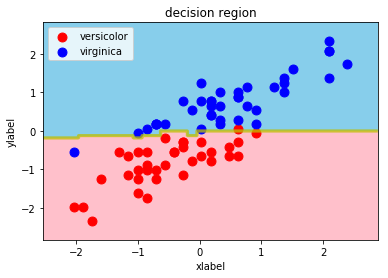

In [70]:
decision_region(X_train_sc, y_train, knn_5)

decision_region(X_train_sc, y_train, logreg)

decision_region(X_train_sc, y_train, svmcf)

decision_region(X_train_sc, y_train, dtcf)

decision_region(X_train_sc, y_train, RF)

<pre>
正解率、適合率、再現率、F1値を見るとロジスティック回帰、決定木、ランダムフォレストの方が数値が良い
しかしグラフを見るとSVMは曲線で分類しているため分類能力が高そうである。

数値の高い中でグラフを見ると決定木はグラフの境界面が曲がるが、ロジスティック回帰、ランダムフォレストは直線で分類している
このデータの分類で二つはあまり差はないが、ロジスティック回帰の方が若干分類がされていると思う

グラフだけ見ればSVM
数値とグラフを見ればロジスティック回帰